In [3]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [4]:
# pip install -U imbalanced-learn

In [5]:
# df = pd.read_csv('../combined_profile.csv')
# # df.info()
# df['status']= df['status'].apply(lambda x:x.strip())
# df['gender']= df['gender'].apply(lambda x:x.strip())
# df

df = pd.read_csv('../data_cat_draft.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7934 entries, 0 to 7933
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0.1                    7934 non-null   int64 
 1   Unnamed: 0                      7934 non-null   int64 
 2   username                        7934 non-null   object
 3   age                             7934 non-null   int64 
 4   occupation                      7934 non-null   object
 5   status                          7934 non-null   object
 6   gender                          7934 non-null   object
 7   filtered sentence               7934 non-null   object
 8   y                               7934 non-null   int64 
 9   translated_occupation           7934 non-null   object
 10  translated_occupation_lem       7934 non-null   object
 11  translated_occupation_category  3920 non-null   object
dtypes: int64(4), object(8)
memory usage: 743.9+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df['translated_occupation_category'].value_counts()

self employed    929
engineer         766
student          587
military         410
medical          297
education        290
office           227
construction     162
tech              69
service           54
sales             50
finance           43
unemployed        36
Name: translated_occupation_category, dtype: int64

In [8]:
# label encoding for status and gender columns
labelencoder = LabelEncoder()
df[['status_encoded','gender_encoded']]=df[['status','gender']].apply(labelencoder.fit_transform)

In [9]:
# label encoding for occupation category
df[['translated_occupation_category_encoded']]=df[['translated_occupation_category']].apply(labelencoder.fit_transform)

In [10]:
# binning for age column
# label=['18-34','35-48','49-60','61-85']
df['age_group']= pd.qcut(df['age'],4)

In [11]:
# label encoding for age column
df['age_group_encoded'] = labelencoder.fit_transform(df['age_group'])

In [12]:
df.head()

Unnamed: 0.1  Unnamed: 0    username  age  occupation  status  gender  \
0             0           0   sandralee   19     student  single  female   
1             1           1    dayana16   19  estudiante  single  female   
2             2           2       Denn_   19  Estudiante  single  female   
3             3           3  Gabrielita   19  Estudiante  single  female   
4             4           4   Luisa5401   19  Estudiante  single  female   

                                   filtered sentence  y translated_occupation  \
0  Im really chill person looking someone chill I...  0               student   
1  white Bisexual Other nonsmoker occasional drin...  0               student   
2  hispanic Bisexual Atheist nonsmoker never Fun ...  0               student   
3  hispanic Bisexual Christian nonsmoker never Se...  0               student   
4  hispanic Straight Other nonsmoker never Fun Fr...  0               student   

  translated_occupation_lem translated_occupation_category  status_encoded  \
0                   student                        student               4   
1                   student                        student               4   
2                   student                        student               4   
3                   student                        student               4   
4                   student                        student               4   

   gender_encoded  translated_occupation_category_encoded       age_group  \
0               0                                      10  (17.999, 31.0]   
1               0                                      10  (17.999, 31.0]   
2               0                                      10  (17.999, 31.0]   
3               0                                      10  (17.999, 31.0]   
4               0                                      10  (17.999, 31.0]   

   age_group_encoded  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [13]:
df['age_group_encoded'].value_counts()

2    1075
0    1005
1     977
3     863
Name: age_group_encoded, dtype: int64

In [14]:
# features
X = df.loc[:,['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
X.sample(10)


status_encoded  gender_encoded  age_group_encoded  \
2577               4               0                  1   
6452               4               1                  1   
7081               0               1                  2   
6264               0               0                  1   
5416               4               0                  0   
6202               0               0                  1   
5770               6               0                  0   
6686               6               1                  2   
7179               6               1                  2   
6357               0               1                  1   

      translated_occupation_category_encoded  
2577                                       4  
6452                                       8  
7081                                       7  
6264                                       8  
5416                                      10  
6202                                       8  
5770                                       8  
6686                                       5  
7179                                       2  
6357                                       5

<h3>Before Sampling<h3>

In [15]:
# target
y = df["y"]

In [16]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=99)

In [17]:
# initialise Decision Tree
clf1 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.5880681818181818, 0.9615384615384616, 'X[0] <= 5.0\nentropy = 0.999\nsamples = 1568\nvalue = [814, 754]'),
 Text(0.2854020979020979, 0.8846153846153846, 'X[3] <= 1.5\nentropy = 0.969\nsamples = 1320\nvalue = [796, 524]'),
 Text(0.08741258741258741, 0.8076923076923077, 'X[3] <= 0.5\nentropy = 0.636\nsamples = 168\nvalue = [141, 27]'),
 Text(0.03146853146853147, 0.7307692307692307, 'X[2] <= 1.5\nentropy = 0.897\nsamples = 51\nvalue = [35, 16]'),
 Text(0.013986013986013986, 0.6538461538461539, 'X[0] <= 0.5\nentropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.006993006993006993, 0.5769230769230769, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02097902097902098, 0.5769230769230769, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.04895104895104895, 0.6538461538461539, 'X[0] <= 1.0\nentropy = 0.997\nsamples = 32\nvalue = [17, 15]'),
 Text(0.03496503496503497, 0.5769230769230769, 'X[2] <= 2.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.02797202797

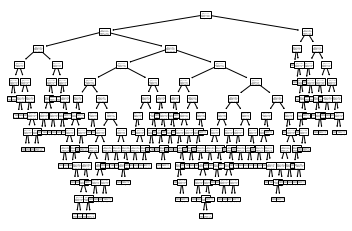

In [18]:
tree.plot_tree(clf1)

In [19]:
# get predictions and compare results
predictions1 = clf1.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions1})
results_df.sample(10)

Actual  Predicted
5393       1          1
5482       1          1
4420       0          0
5806       1          1
2797       0          1
3890       0          0
3361       0          0
3355       0          0
7250       1          1
2015       0          0

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions1)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("before sampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

before sampling
Accuracy: 0.7882653061224489
Precision: 0.7444444444444445
recall: 0.8420107719928187
f1_score: 0.7902274641954508


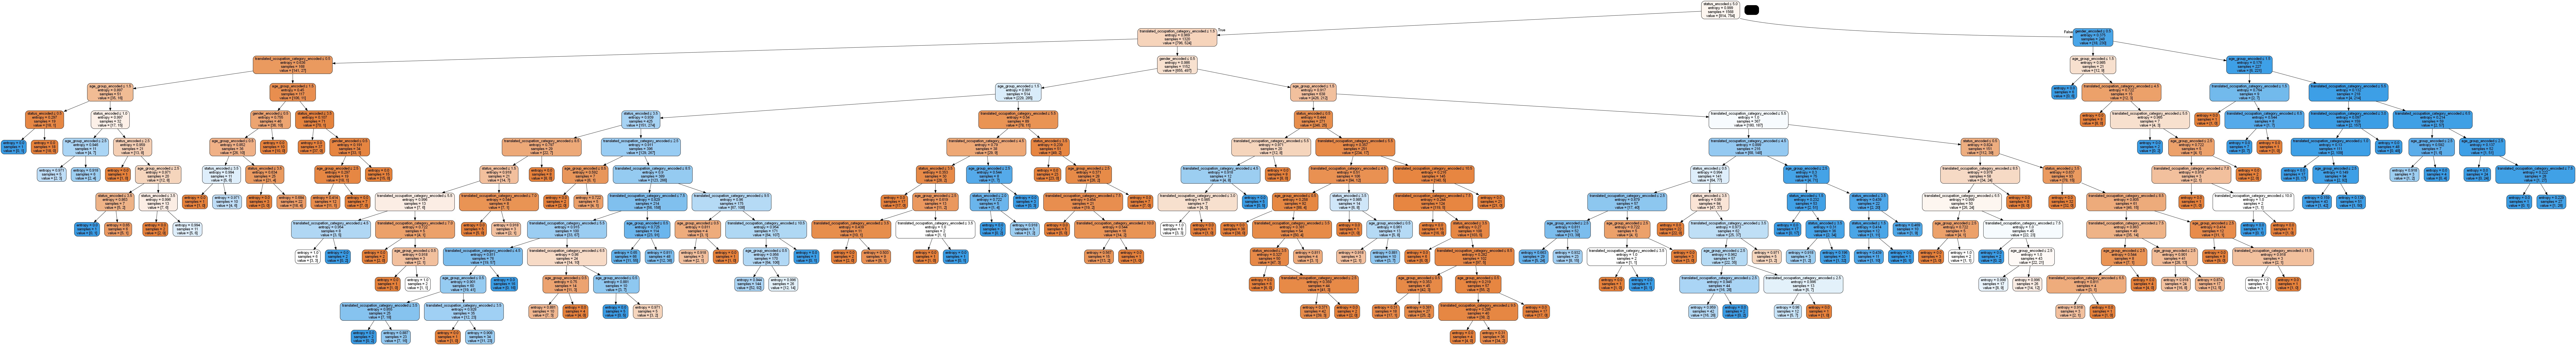

In [21]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded','translated_occupation_category_encoded']

dot_data = StringIO()
export_graphviz(clf1, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h3> Random Under Sampling<h3>

In [22]:
# random under sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [23]:
# initialise Decision Tree
clf2 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf2.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.5895474137931035, 0.9615384615384616, 'X[0] <= 5.0\nentropy = 1.0\nsamples = 1508\nvalue = [754, 754]'),
 Text(0.28685344827586207, 0.8846153846153846, 'X[3] <= 1.5\nentropy = 0.979\nsamples = 1260\nvalue = [736, 524]'),
 Text(0.08620689655172414, 0.8076923076923077, 'X[3] <= 0.5\nentropy = 0.662\nsamples = 157\nvalue = [130, 27]'),
 Text(0.03103448275862069, 0.7307692307692307, 'X[2] <= 1.5\nentropy = 0.925\nsamples = 47\nvalue = [31, 16]'),
 Text(0.013793103448275862, 0.6538461538461539, 'X[0] <= 1.5\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.006896551724137931, 0.5769230769230769, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.020689655172413793, 0.5769230769230769, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.04827586206896552, 0.6538461538461539, 'X[0] <= 1.0\nentropy = 0.999\nsamples = 31\nvalue = [16, 15]'),
 Text(0.034482758620689655, 0.5769230769230769, 'X[2] <= 2.5\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(0.0275862068

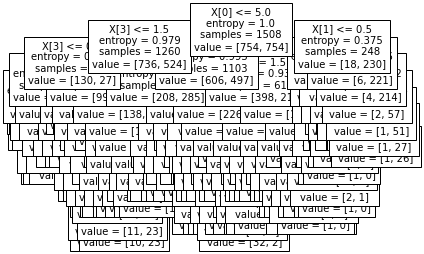

In [24]:
tree.plot_tree(clf2, fontsize=10)



(process:19756): GLib-GIO-WARNING **: 11:16:40.056: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



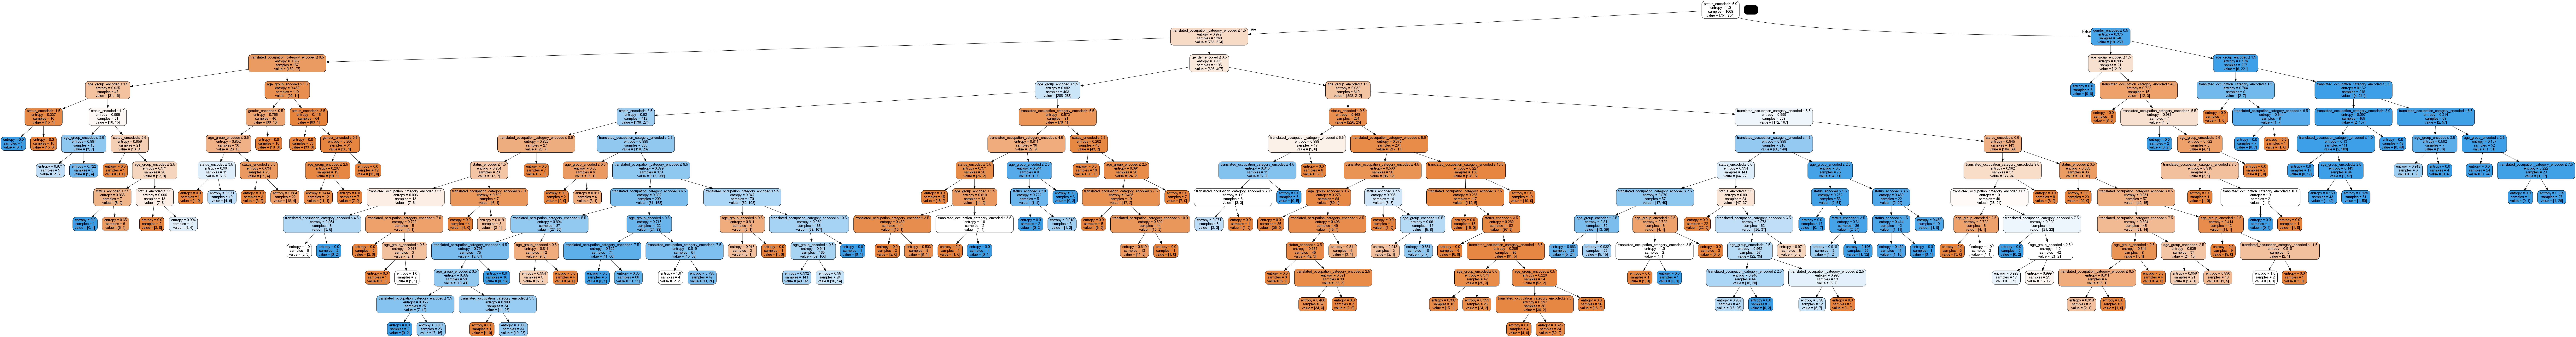

In [25]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded', 'translated_occupation_category_encoded']

dot_data = StringIO()
export_graphviz(clf2, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
# get predictions and compare results
predictions2 = clf2.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions2})
results_df.sample(10)

Actual  Predicted
7271       1          1
7638       1          1
2221       0          0
7631       1          1
4329       0          0
7087       1          1
1534       0          1
2998       0          0
7005       1          1
17         0          1

In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions2)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("random undersampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

random undersampling
Accuracy: 0.7882653061224489
Precision: 0.74251968503937
recall: 0.8464991023339318
f1_score: 0.7911073825503355


<h3> Random Over Sampling<h3>

In [28]:
# random over sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [29]:
# initialise Decision Tree
clf3 = DecisionTreeClassifier(criterion='entropy',random_state=42) 

# train model
clf3.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.5915329391891891, 0.9615384615384616, 'X[0] <= 5.0\nentropy = 1.0\nsamples = 1628\nvalue = [814, 814]'),
 Text(0.2886402027027027, 0.8846153846153846, 'X[3] <= 1.5\nentropy = 0.979\nsamples = 1361\nvalue = [796, 565]'),
 Text(0.08868243243243243, 0.8076923076923077, 'X[3] <= 0.5\nentropy = 0.659\nsamples = 170\nvalue = [141, 29]'),
 Text(0.03209459459459459, 0.7307692307692307, 'X[2] <= 1.5\nentropy = 0.912\nsamples = 52\nvalue = [35, 17]'),
 Text(0.013513513513513514, 0.6538461538461539, 'X[0] <= 0.5\nentropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.006756756756756757, 0.5769230769230769, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02027027027027027, 0.5769230769230769, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.05067567567567568, 0.6538461538461539, 'X[0] <= 1.0\nentropy = 0.999\nsamples = 33\nvalue = [17, 16]'),
 Text(0.033783783783783786, 0.5769230769230769, 'X[2] <= 2.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.027027027027

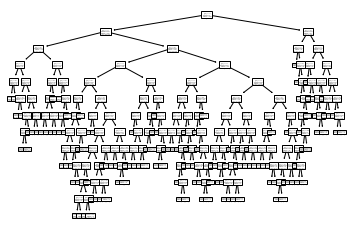

In [30]:
tree.plot_tree(clf3)

In [31]:
# get predictions and compare results
predictions3 = clf3.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions3})
results_df.sample(10)

Actual  Predicted
7514       1          1
5061       0          0
3237       0          0
2883       0          0
5324       1          1
4680       0          0
235        0          0
6351       1          0
585        0          0
3654       0          0

In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions3)
tn = conf_matrix[0][0]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
fp = conf_matrix[0][1]

accuracy = (tp + tn)/(tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall)/(precision + recall)

print("random oversampling")
print("Accuracy:",accuracy)
print("Precision:",precision)
print("recall:",recall)
print("f1_score:",f1_score)

random oversampling
Accuracy: 0.7891156462585034
Precision: 0.7436908517350158
recall: 0.8464991023339318
f1_score: 0.7917716204869857


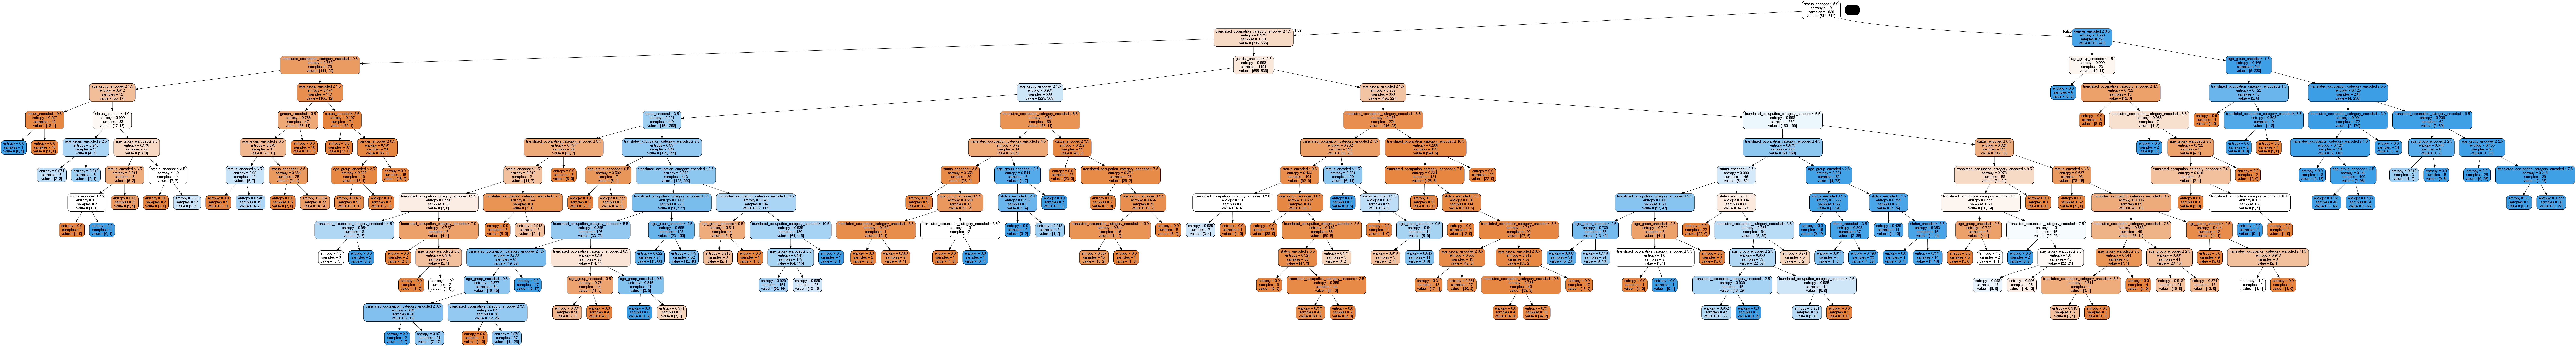

In [33]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = ['status_encoded', 'gender_encoded','age_group_encoded', 'translated_occupation_category_encoded']

dot_data = StringIO()
export_graphviz(clf3, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h3>Test on testing data<h3>

In [34]:
data = [[58,'married','male','engineer']]
testdf = pd.DataFrame(data, columns=['age', 'status','gender', 'translated_occupation_category'])
testdf['age_group_encoded'] = 3
testdf['status_encoded'] = 2
testdf['gender_encoded'] = 1
testdf['translated_occupation_category_encoded']=4
test = testdf[['status_encoded','gender_encoded','age_group_encoded','translated_occupation_category_encoded']]
pred = clf1.predict(test)
results = pd.DataFrame({'Pred': pred})
results

Pred
0     0